In [1]:
!jt -t oceans16 -cellw 100%

Change this to whatever your datafiles are called

In [75]:
file = "data.csv"
dbfile = "data.db"
qualfile = "qualStats.csv"

In [34]:
import numpy as np
import pandas as pd
import scipy.stats as ss

import matplotlib.pyplot as plt

In [35]:
cols = ['Progress', 'ResponseId', 'Finished', 'Duration (in seconds)', 'ifBelieveEffectiveProctor', 'ifInterview']

In [36]:
data = pd.read_csv(file)
data.drop(cols, inplace = True, axis = 1)

#we dont need the specific qualitative answers right now
data.drop([c for c in data.columns if c.startswith('Qual_') or c.startswith('End')],inplace = True, axis = 1)

referer = data.filter(['Demo 7', 'Referer', 'SocialSource'], axis = 1)
data.drop(['Demo 7', 'Referer', 'SocialSource'], inplace = True, axis = 1)

data.replace(-100, np.NaN, inplace=True)

In [37]:
qualdata = pd.read_csv(qualfile)
#Squash down all the codes for each document to get specific codes said by specific people.

codedata = qualdata[qualdata.columns.difference(['D'])] #everything but the document number
qualdata[qualdata.columns.difference(['D'])] = codedata.astype(bool)

noresponse = qualdata[qualdata['No Response']].head(1).copy()

tempdf = pd.DataFrame()

for i in range (1, len(data)+1):
    temp = qualdata[qualdata['D'] == i]
    if len(temp) == 0:
        # no response
        noresponse['D'] = i
        tempdf = tempdf.append(noresponse, ignore_index = True)
    else:
        #merge all the instances on (1) basically logical or them but with 0/1
        temp1 = pd.DataFrame(temp.any(axis=0)).T #gets the logical or of the subset
        temp1['D'] = i
        tempdf = tempdf.append(temp1, ignore_index = True)
        #print(i, len(tempdf))
        
tempdf.reindex_like(qualdata)
qualdata = tempdf


Combine data with qualdata so we can analyse whether answers corresponds with certain codes

In [38]:
data.rename(columns={'Unnamed: 0':'id'}, inplace=True)
data = pd.concat([data,qualdata], axis = 1)#.set_index('id')

Uncomment the following to get demographics data

In [39]:
temp = []
for uni in data['University']:
    if 'NYU' in uni.upper():
        temp.append('NYU')
    elif 'HUNTER' in uni.upper():
        temp.append('Hunter College')
    elif 'AUBG' in uni.upper() or 'BULGARIA' in uni.upper():
        temp.append('American University in Bulgaria')
    elif 'CCNY' in uni.upper() or 'CITY COLLEGE OF NEW YORK' in uni.upper():
        temp.append('City College of New York')
    elif 'JAIN' in uni.upper():
        temp.append('Jain University')
    elif 'WISCONSIN' in uni.upper():
        temp.append('University of Wisconsin')
    elif 'COLUMBIA' in uni.upper():
        temp.append('Columbia University')
    elif 'YALE' in uni.upper():
        temp.append('Yale University')
    else:
        temp.append(uni)

data['University'] = pd.DataFrame(temp)

In [40]:
#print(data['degreePersuing'].value_counts())
#print(data.groupby(['degreePersuing','yearInProgram']).size())
#print(data['Age'].value_counts())
#recruitment source
print(referer['SocialSource'].value_counts())
print('Anything that does not have a social source tag was social media (so add n-total social source)')
#print(data['ifZoomUsed'].value_counts())
#print(data['ifLMSUsed'].value_counts())
#print(data['ifProctorUsed'].value_counts())
#print(data['University'].value_counts())

email        78
redditss     13
emailh       12
dbud          9
facebook      5
ff            2
quch          1
facebookh     1
Name: SocialSource, dtype: int64
Anything that does not have a social source tag was social media (so add n-total social source)


In [41]:
data.drop(['degreePersuing','yearInProgram', 'D', 'University'], inplace = True, axis = 1)

In [57]:
#print(data['ifLecturesRecorded'].value_counts())
#print(data['ifMandatoryCamera'].value_counts())
# print(data['ifWantRemote'].value_counts())
# print(data['ifWantCameraOn'].value_counts())
# print(data['ifWantRecording'].value_counts())
#print(data['ifComfortableProctor'].value_counts())
#print(data['ifPreferProctor'].value_counts())
#print(data['ifBelieveFairProctor'].value_counts())
#print(data['ifBelieveEffectiveProctorId'].value_counts())
#print(data['No Response'].value_counts())
#Number of Qual Respondants by Question
#print(len(data[ data['Qual_Exam'] & ~data['No Response'] ]))
#print(len(data[ data['Qual_Zoom'] & ~data['No Response'] ]))
#print(len(data[ data['Qual_Proctor'] & ~data['No Response'] ]))
#print(len((data[ (data['End1'] | data['End2']) & ~data['No Response'] ])))

#Number of people who responded to thematic category
# accessibility = ['Falsely accused of cheating', 'Accessible','In-accessible','Not allowed to perform biological functions', 
#                  'Likes classes being recorded', 'Technical Limitations', 'Unintuitive UI', 'Learning curve']
# engagement = ['Difficulty focusing', 'Difficulty socializing/engaging', 'Lack of social presence', 'Classes less engaging', 
#               'Camera on more engaging', 'Fear of judgement', 'Cameras should be mandatory', 'easier to ask questions', 
#               'Zoom fatigue', 'camera off less engaging', 'Camera on less engaging', 'Easier to focus', 
#               'lack of understanding of social norms','Small class easier to engage', 'Possibility of falling behind', 
#               'Not suitable for engagement-heavy classes', 'Unsuitable environment (potentially)', 'Blurred Boundaries', 
#               'Comfortable recorded and turning camera on']
# instrqual = ['Possibility of falling behind', 'Not suitable for engagement-heavy classes', 'Exams easier/less stressful',
#              'Proctoring Software Ineffective', 'exams harder/ more stressful', 'Felt there was more cheating',
#              'Instructor adapted exam well', 'Professors unsupportive/not adapting', 'Unable to go back to prior questions during exams',
#              'Less time per question on exam', 'Poor Instructional Quality', 'Proctoring software effective', 
#              'doesnt feel like real class', 'Everything needed for class', 'More analogous to the real world', 
#              'high quality class materials', 'instructor dependant', 'Professor more engaged']
# privacy = ['Unsuitable environment (potentially)', 'Blurred Boundaries', 'Comfortable recorded and turning camera on',
#            'Proctoring Software Intrusive/ Invasive', 'Discomfort with mandatory camera', 'Discomfort with turning camera on',
#            'Discomfort with being recorded', 'Concerns about data collection', 'uncertainty', 
#            'Concern about privacy leaks', 'Discomfort with being monitored', 
#            'Feared accidentally unmuting or turning camera on/sharing wrong tab','desires transparency wrt data collection',
#            'I made a comprise of my privacy for a credential and I’m not happy a', 'resignation', 'I trust my institution', 'Felt privacy intact', 'invasive']
#technical = ['Technical Limitations', 'Unintuitive UI', 'Learning curve']
#print(len((data[ data['Technical Limitations'] | data['Unintuitive UI'] | data['Learning curve'] ])))
# print(len(data[data[accessibility].any(axis=1)]))
# print(len(data[data[engagement].any(axis=1)]))
# print(len(data[data[instrqual].any(axis=1)]))
# print(len(data[data[privacy].any(axis=1)]))
#print(len(data[data[technical].any(axis=1)]))


LMS data doesnt seem particularly useful here since it wasnt mentioned much in the qualitative responses. We also dont ask too many questions wrt LMS.

In [58]:
#print(data['ifLMSHelped'].value_counts())
data.drop([c for c in data.columns if 'LMS' in c], inplace = True, axis = 1)

Should probably check for correlations between only columns that are related. Ie Camera and Recording with other Camera and Recording stuff. Though proctoring beliefs and cameras might have some relationship, it is less relevant and computationally infeasible because of how many codes we have. We can try to correlate between just the survey likert responses.



In [44]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
        Found: https://stackoverflow.com/a/39266194/1072532
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [45]:
cols = ['Age']+[c for c in data.columns if 'if' in c and 'Id' not in c and 'Used' not in c][:8]
print(data['Age'].value_counts())
likerts = data[cols].apply(lambda x : pd.factorize(x, na_sentinel=-1)[0])#+1
#Standard Chi Squared for categorical values doesnt work. Sample size too small for some categories? 
#https://github.com/scipy/scipy/issues/14298
#pd.DataFrame([ss.chisquare(likerts[x].values,f_exp=likerts.values.T,axis=1)[0] for x in likerts])

18-24    82
25-34    40
35-44     9
55-64     1
Name: Age, dtype: int64


In [46]:
contingencymatrices = []
#for each column get confusion matrix with all other columns 
#if matrix does not already exist ie calculate conf[i,j] if conf[j,i] DNE 
# probably just check whether j > i because if i < j then its transpose has been done

for i in range (len(likerts.columns)):
    contingencymatrices.append([])
    for j in range(len(likerts.columns)):
        if i == j:
            contingencymatrices[i].append(1) #because the same column vs same column is just going to be 1
        if j > i:
            contingencymatrices[i].append(None)
        if i > j: #if i > j then redundant
            #drop rows where either cols value is -1
            temp = likerts[ (likerts[likerts.columns[i]] > -1) & (likerts[likerts.columns[j]] > -1) ]
            contingencymatrices[i].append(pd.crosstab(temp[likerts.columns[i]], temp[likerts.columns[j]]))
        
#c = temp.groupby(['ifComfortableProctor'], dropna=False, as_index=False).size()
#print(c)
#print(contingencymatrices[8][0])

Cramer's V

In [73]:
#print(pd.show_versions())
cramersV = []
for i in range (len(contingencymatrices)):
    cramersV.append([])
    for j in contingencymatrices[i]:
        if isinstance(j, pd.DataFrame):
            cramersV[i].append(cramers_corrected_stat(j.to_numpy()))
        else:
            cramersV[i].append(j)
            
cramersVDf = pd.DataFrame(cramersV)
print(cramersVDf)

          0         1         2         3         4         5         6  \
0  1.000000       NaN       NaN       NaN       NaN       NaN       NaN   
1  0.157447  1.000000       NaN       NaN       NaN       NaN       NaN   
2  0.133681  0.083102  1.000000       NaN       NaN       NaN       NaN   
3  0.158726  0.143441  0.000000  1.000000       NaN       NaN       NaN   
4  0.081006  0.099969  0.083697  0.147410  1.000000       NaN       NaN   
5  0.000000  0.136129  0.215745  0.000000  0.000000  1.000000       NaN   
6  0.000000  0.204273  0.143827  0.000000  0.201096  0.000000  1.000000   
7  0.152175  0.122432  0.000000  0.180479  0.104000  0.000000  0.291882   
8  0.000000  0.159539  0.000000  0.133478  0.109498  0.112745  0.218880   

          7    8  
0       NaN  NaN  
1       NaN  NaN  
2       NaN  NaN  
3       NaN  NaN  
4       NaN  NaN  
5       NaN  NaN  
6       NaN  NaN  
7  1.000000  NaN  
8  0.245325  1.0  


<Figure size 432x288 with 0 Axes>

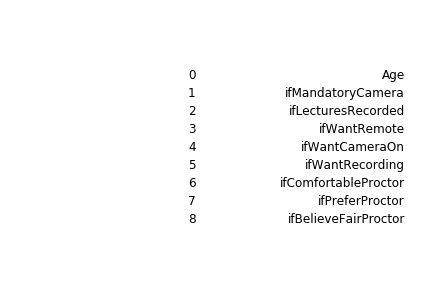

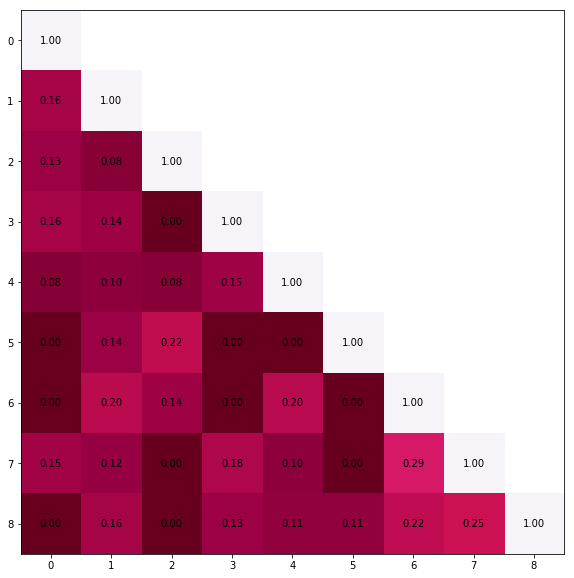

In [48]:
#fig = plt.subplots()

ifg = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(5,5))
tablecolumns=[[i, likerts.columns[i]] for i in range(len(likerts.columns))]
#ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=tablecolumns,loc="center", edges='open')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)

plt.show()

fig, x = plt.subplots(figsize=(10,10))
x.matshow(cramersVDf, cmap='PuRd_r', vmin=0.0000000)
#fig.colorbar(x)

x_ticks = np.arange(0, len(cramersVDf), 1)
plt.xticks(x_ticks)
plt.yticks(x_ticks)
x.xaxis.set_ticks_position('bottom')

for (i, j), z in np.ndenumerate(cramersVDf):
    if not np.isnan(z):
        x.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')
    
plt.show()

Chi^2 Goodness of fit

In [62]:
likerts.corr(method='pearson', min_periods=1)
chi2 = []
p = []
df = []
for i in range (len(contingencymatrices)):
    chi2.append([])
    p.append([])
    df.append([])
    for j in contingencymatrices[i]:
        if isinstance(j, pd.DataFrame):
            chi2[i].append(ss.chi2_contingency(j)[0])
            #p[i].append(ss.chi2_contingency(j)[0:2])
            p[i].append(ss.chi2_contingency(j)[1])
            df[i].append(ss.chi2_contingency(j)[2])
        else:
            chi2[i].append(None)
            p[i].append(None)
            df[i].append(None)
            
chi2 = pd.DataFrame(chi2)
p = pd.DataFrame(p)
df = pd.DataFrame(df)
print("chi2\n", chi2)
print("p\n",p)
print("df\n",df)

chi2
            0          1          2          3          4          5  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1  18.586711        NaN        NaN        NaN        NaN        NaN   
2  15.930291  11.720616        NaN        NaN        NaN        NaN   
3  21.765062  19.991823  10.282245        NaN        NaN        NaN   
4  14.611678  15.929246  14.781787  27.159064        NaN        NaN   
5   7.852979  19.206977  29.962699   8.695610  15.433648        NaN   
6   5.982626  22.403375  17.229439  14.970117  29.285216  14.137616   
7  17.904903  15.828718   8.222765  26.737853  19.692791   6.701636   
8   9.332893  18.401512   7.071504  21.959631  20.072881  20.306532   

           6          7     8  
0        NaN        NaN  None  
1        NaN        NaN  None  
2        NaN        NaN  None  
3        NaN        NaN  None  
4        NaN        NaN  None  
5        NaN        NaN  None  
6        NaN        NaN  None  
7  44.116154        NaN  No

In [56]:

# fig, y = plt.subplots(figsize=(10,10))
# y.matshow(chi2, cmap='PuRd_r', vmin=0.0000000)

# x_ticks = np.arange(0, len(chi2), 1)
# plt.xticks(x_ticks)
# plt.yticks(x_ticks)
# y.xaxis.set_ticks_position('bottom')

# for (i, j), z in np.ndenumerate(chi2):
#     if not np.isnan(z):
#         y.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')
    
# plt.show()


---

In [60]:
#print (data)

In [59]:
#for col in data.columns:
#    print (col)

In [22]:
#print(qual)
#qual.to_csv('qual.csv')

In [ ]:
# print(referer)